In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [3]:
base_dir = '/content/drive/MyDrive/shot/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [4]:
BATCH_SIZE = 5
IMG_SIZE = (180, 180)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [5]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 30 files belonging to 2 classes.


In [6]:
Xception_model = Sequential()

pretrained_model= tf.keras.applications.xception.Xception(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

Xception_model.add(pretrained_model)

83683744/83683744 [==============================] - 1s 0us/step


In [7]:
Xception_model.add(tf.keras.layers.Flatten())
Xception_model.add(tf.keras.layers.Dense(512, activation='relu'))
Xception_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
Xception_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = Xception_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 48s 2s/step - loss: 71.5862 - accuracy: 0.5000 - val_loss: 17.4435 - val_accuracy: 0.5333
Epoch 2/50
20/20 [==============================] - 17s 849ms/step - loss: 16.6855 - accuracy: 0.5900 - val_loss: 22.2743 - val_accuracy: 0.5000
Epoch 3/50
20/20 [==============================] - 17s 840ms/step - loss: 19.9998 - accuracy: 0.5800 - val_loss: 11.4292 - val_accuracy: 0.6667
Epoch 4/50
20/20 [==============================] - 17s 863ms/step - loss: 8.2288 - accuracy: 0.6700 - val_loss: 4.1824 - val_accuracy: 0.7000
Epoch 5/50
20/20 [==============================] - 17s 863ms/step - loss: 2.3082 - accuracy: 0.7900 - val_loss: 3.0594 - val_accuracy: 0.7667
Epoch 6/50
20/20 [==============================] - 19s 967ms/step - loss: 1.8512 - accuracy: 0.7800 - val_loss: 4.0101 - val_accuracy: 0.7333
Epoch 7/50
20/20 [==============================] - 17s 858ms/step - loss: 1.1782 - accuracy: 0.7500 - val_loss: 2.4401 - val_accuracy: 0.8000
Epoch 8

Text(0.5, 1.0, 'Training and Validation Accuracy (Xception)')

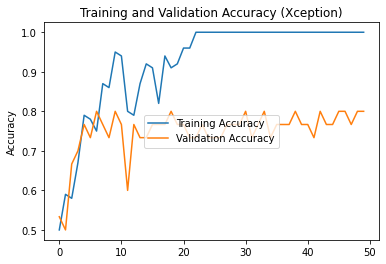

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='center')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Xception)')

In [10]:
loss, accuracy = Xception_model.evaluate(validation)
print('Test accuracy :', accuracy)

6/6 [==============================] - 4s 660ms/step - loss: 2.4809 - accuracy: 0.8000
Test accuracy : 0.800000011920929


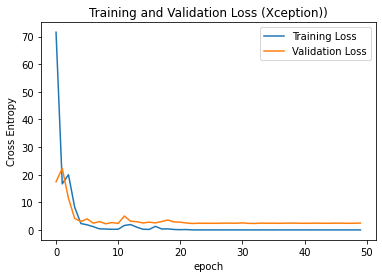

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss (Xception))')
plt.xlabel('epoch')
plt.show()